In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data = pd.read_excel('/content/drive/MyDrive/최종 데이터/pca_f.xlsx')
data = data.set_index('district')

In [3]:
# 데이터 스케일링
std_df = StandardScaler().fit_transform(data)
std_df = pd.DataFrame(std_df, index=data.index, columns=data.columns)
data = std_df
df_f = data.copy()

In [4]:
# 실루엣 계수 함수
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    #fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    fig, axs = plt.subplots(figsize=(6*n_cols, 4), nrows=1, ncols=n_cols) # 안겹치게 사이즈 늘리기


    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])


        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

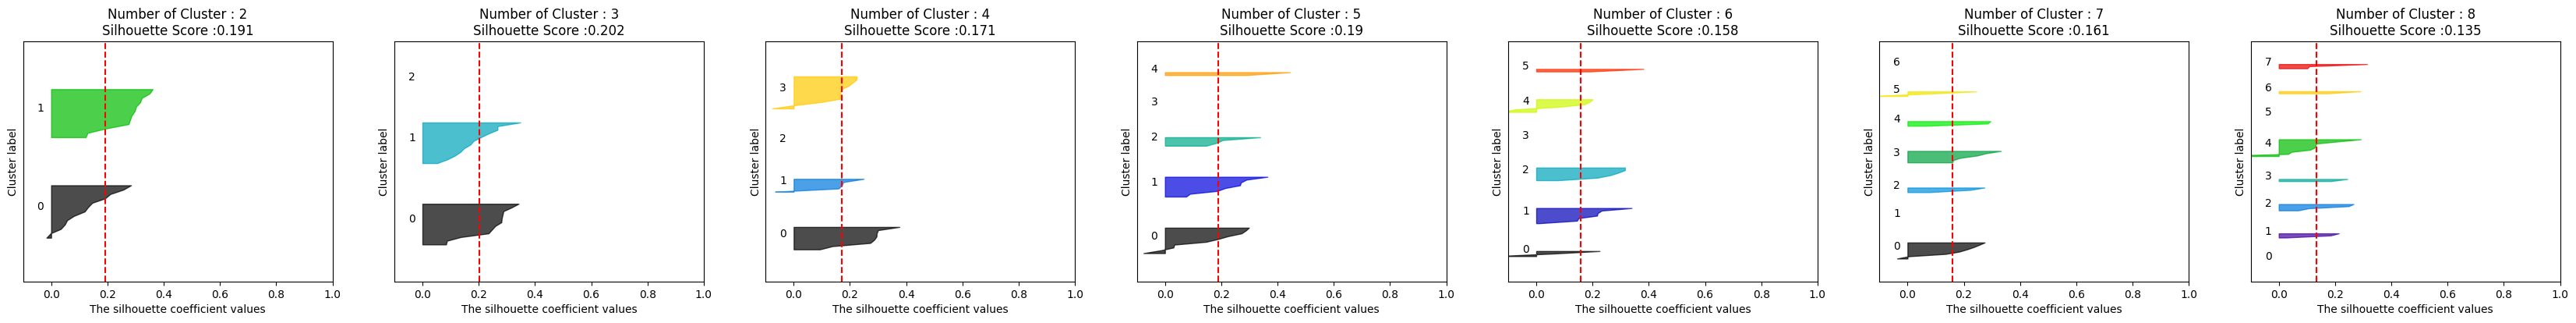

In [5]:
# 군집개수 2~8 실루엣 스코어 확인
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], data)

In [6]:
# 선정된 군집개수 수로 모델 생성
clust_model = KMeans(n_clusters = 3)
clust_model.fit(df_f)
centers = clust_model.cluster_centers_
pred = clust_model.predict(df_f)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# cluster 열을 만들어서 예측 값을 할당 함으로써 군집화
# cluster를 그룹화 해서 살펴보기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.groupby('clust').mean()

,total_beneficiary,all_welfare_centers,keyword_expansion_budget,child_care_ratio,total_beneficiary_ratio,welfare_centers,child_care_total_budget,family_support_center,basic_livelihood_ratio,median_income_less30_grand,child_welfare_facilities,vulnerable_group_ratio
clust,,,,,,,,,,,,
0,0.742767,0.669013,0.014135,-0.247123,0.720980,-0.241223,0.097645,0.204124,0.596758,0.549773,0.649193,0.425950
1,-0.789487,-0.769479,-0.221698,0.037897,-0.672636,-0.147726,-0.321114,-0.221134,-0.548343,-0.549773,-0.631399,-0.515249
2,0.560646,1.205593,2.490764,2.510718,-0.580129,4.667386,2.681632,0.204124,-0.580977,0.000000,-0.213522,1.071590


In [8]:
# 클러스터별로 자치구 확인해보기
print('c0 ')
print(clust_df[clust_df.clust == 0].index)
print('c1 ')
print(clust_df[clust_df.clust == 1].index)
print('c2 ')
print(clust_df[clust_df.clust == 2].index)

c0 
Index(['gangbok', 'gangseo', 'gwanak', 'guro', 'geum', 'nowon', 'dobong',
       'dongjak', 'seongbuk', 'yang', 'eunpyeong', 'jungnang'],
      dtype='object', name='district')
c1 
Index(['gangnam', 'gangdong', 'gwangjin', 'dongdae', 'mapo', 'seodae',
       'seocho', 'seongdong', 'yeongdeung', 'yongsan', 'jongno', 'jung'],
      dtype='object', name='district')
c2 
Index(['songpa'], dtype='object', name='district')
